# Notation

$$
A_T=\frac{x(T)-x(0)}{T} \\
K = x(T)-x(0) \\


$$


# Diffusion bridges
---
Diffusion bridges 是一类特定类型的 stochastic bridges。具体来说,diffusion bridges 是指由扩散过程(满足伊藤随机微分方程)推导而来的桥过程。而 stochastic bridges 更广泛,可以由各种马尔可夫过程条件化而得到。

$$
\begin{aligned}
&\frac{d y}{d t}=c_T(y, t)+\sigma(y, t) \eta(y, t) \\
\text{where, }& \\
& c_T(x, t)=b(x, t)+\sigma^2(x, t) \frac{\partial}{\partial x} \ln p(K, T \mid x, t)
\end{aligned}
$$

## Brownian bridge
---

$$
b(x, t)=\text { const. } \equiv \mu, \quad \sigma(x, t)=\text { const. } \equiv \sigma
$$

布朗桥方程：
$$
\frac{d y}{d t}=\frac{a T-y}{T-t}+\sigma \eta
$$

对于每个dy：
$$
\Delta y=\frac{a T-y}{T-t} \epsilon+\sigma \sqrt{\epsilon} \eta
$$

$$
c_T(x, t) = \mu + \sigma^2 \frac{\partial}{\partial x} \ln p(K, T \mid x, t)
$$

$$
p(K, T \mid x, t)=\frac{1}{\sigma \sqrt{2 \pi(T-t)}} \mathrm{e}^{-\frac{[K-x-\mu(T-t)]^2}{2(T-t) \sigma^2}} .
$$

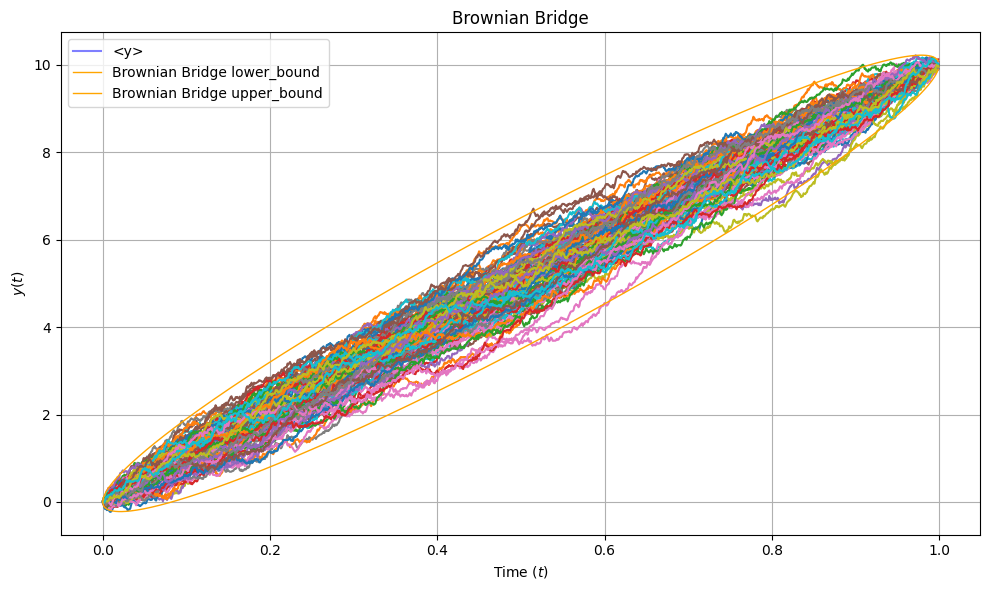

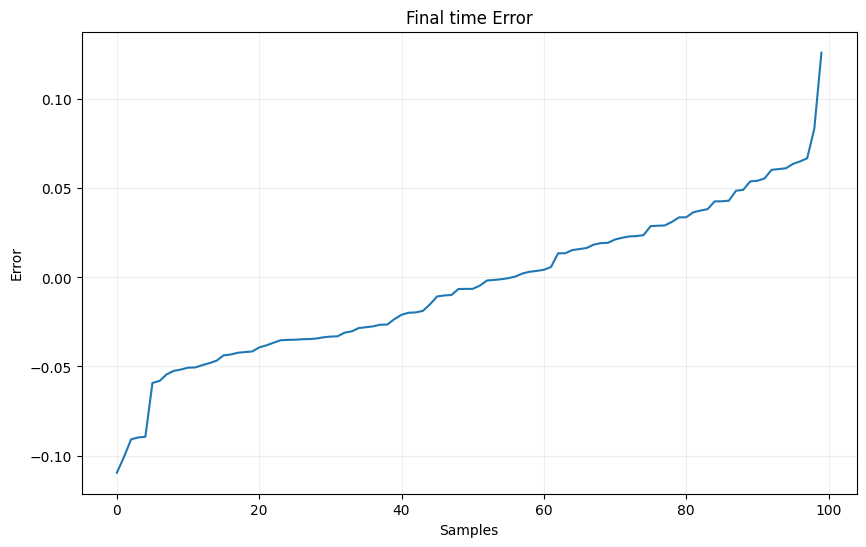

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

np.random.seed(233)
experiment_name = "bd"  # 你可以根据需要动态设置这个变量
log_dir = Path('experiments') / experiment_name
log_dir.mkdir(parents=True, exist_ok=True)
mu = 0
sigma = 1
a = 10
T = 1
epsilon = 0.001
num_samples = 100

t = np.arange(0, T, epsilon)

y_mean = a * t
variance = sigma**2 * t * (1 - t/T)
std_dev = np.sqrt(variance)

upper_bound = y_mean + 3 * std_dev
lower_bound = y_mean - 3 * std_dev
y_bridge = np.zeros((t.shape[0], num_samples))

for i in range(len(t) - 1):
    dt = t[i+1] - t[i]      # dt = epsilon
    dydt = (a * T - y_bridge[i]) / (T - t[i])
    diffusion = sigma * np.sqrt(dt) * np.random.randn(num_samples,)
    y_bridge[i+1] = y_bridge[i] + dydt * dt
    y_bridge[i+1, :] += diffusion
    
plt.figure(figsize=(10, 6))
plt.plot(t, y_mean, label=r'<y>', color='blue', alpha=0.5)
plt.plot(t, y_bridge)
plt.plot(t, lower_bound, color='orange', linewidth=1, label='Brownian Bridge lower_bound')
plt.plot(t, upper_bound, color='orange', linewidth=1, label='Brownian Bridge upper_bound')


plt.title('Brownian Bridge')
plt.xlabel('Time ($t$)')
plt.ylabel('$y(t)$')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.savefig(log_dir / 'brownian_bridge.jpg', dpi=300)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))

ax.set_title('Final time Error')
ax.grid(alpha=0.2)
ax.set_xlabel('Samples')
ax.set_ylabel('Error')
ax.plot(np.sort(y_bridge[-1, :])-10, label='sigma=1')
o = 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

np.random.seed(233)
experiment_name = "bd"  # 你可以根据需要动态设置这个变量
log_dir = Path('experiments') / experiment_name
log_dir.mkdir(parents=True, exist_ok=True)
mu = 0
sigma = 1
a = 10
T = 1
epsilon = 0.0001
num_samples = 100

t = np.arange(0, T, epsilon)

y_mean = a * t
variance = sigma**2 * t * (1 - t/T)
std_dev = np.sqrt(variance)

upper_bound = y_mean + 3 * std_dev
lower_bound = y_mean - 3 * std_dev
y_bridge = np.zeros((t.shape[0], num_samples))

for i in range(len(t) - 1):
    dt = t[i+1] - t[i]      # dt = epsilon
    dydt = (a * T - y_bridge[i]) / (T - t[i])
    diffusion = sigma * np.sqrt(dt) * np.random.randn(num_samples,)
    y_bridge[i+1] = y_bridge[i] + dydt * dt
    y_bridge[i+1, :] += diffusion

ax.plot(np.sort(y_bridge[-1, :])-10, label='sigma=1, epsilon=0.0001')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

np.random.seed(233)
experiment_name = "bd"  # 你可以根据需要动态设置这个变量
log_dir = Path('experiments') / experiment_name
log_dir.mkdir(parents=True, exist_ok=True)
mu = 0
sigma = 1
a = 10
T = 1
epsilon = 0.00001
num_samples = 100

t = np.arange(0, T, epsilon)

y_mean = a * t
variance = sigma**2 * t * (1 - t/T)
std_dev = np.sqrt(variance)

upper_bound = y_mean + 3 * std_dev
lower_bound = y_mean - 3 * std_dev
y_bridge = np.zeros((t.shape[0], num_samples))

for i in range(len(t) - 1):
    dt = t[i+1] - t[i]      # dt = epsilon
    dydt = (a * T - y_bridge[i]) / (T - t[i])
    diffusion = sigma * np.sqrt(dt) * np.random.randn(num_samples,)
    y_bridge[i+1] = y_bridge[i] + dydt * dt
    y_bridge[i+1, :] += diffusion

ax.plot(np.sort(y_bridge[-1, :])-10, label='sigma=1, epsilon=0.00001')

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

np.random.seed(233)
experiment_name = "bd"  # 你可以根据需要动态设置这个变量
log_dir = Path('experiments') / experiment_name
log_dir.mkdir(parents=True, exist_ok=True)
mu = 0
sigma = 1
a = 10
T = 1
num_samples = 100

epsilon1 = 0.001
epsilon2 = 0.0001

t1 = np.arange(0, 0.95, epsilon1)
t2 = np.arange(0.95, T, epsilon2)
t = np.concatenate((t1, t2))


y_mean = a * t
variance = sigma**2 * t * (1 - t/T)
std_dev = np.sqrt(variance)

upper_bound = y_mean + 3 * std_dev
lower_bound = y_mean - 3 * std_dev
y_bridge = np.zeros((t.shape[0], num_samples))

for i in range(len(t) - 1):
    dt = t[i+1] - t[i]      # dt = epsilon
    dydt = (a * T - y_bridge[i]) / (T - t[i])
    diffusion = sigma * np.sqrt(dt) * np.random.randn(num_samples,)
    y_bridge[i+1] = y_bridge[i] + dydt * dt
    y_bridge[i+1, :] += diffusion

ax.plot(np.sort(y_bridge[-1, :])-10, label='sigma=1, epsilon1 = 0.001 -> epsilon2 = 0.0001')

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

np.random.seed(233)
experiment_name = "bd"  # 你可以根据需要动态设置这个变量
log_dir = Path('experiments') / experiment_name
log_dir.mkdir(parents=True, exist_ok=True)
mu = 0
sigma = 1
a = 10
T = 1
num_samples = 100

epsilon1 = 0.001
epsilon2 = 0.00001

t1 = np.arange(0, 0.99, epsilon1)
t2 = np.arange(0.99, T, epsilon2)
t = np.concatenate((t1, t2))


y_mean = a * t
variance = sigma**2 * t * (1 - t/T)
std_dev = np.sqrt(variance)

upper_bound = y_mean + 3 * std_dev
lower_bound = y_mean - 3 * std_dev
y_bridge = np.zeros((t.shape[0], num_samples))

for i in range(len(t) - 1):
    dt = t[i+1] - t[i]      # dt = epsilon
    dydt = (a * T - y_bridge[i]) / (T - t[i])
    diffusion = sigma * np.sqrt(dt) * np.random.randn(num_samples,)
    y_bridge[i+1] = y_bridge[i] + dydt * dt
    y_bridge[i+1, :] += diffusion

ax.plot(np.sort(y_bridge[-1, :])-10, label='sigma=1, epsilon1 = 0.001 -> epsilon2 = 0.00001')

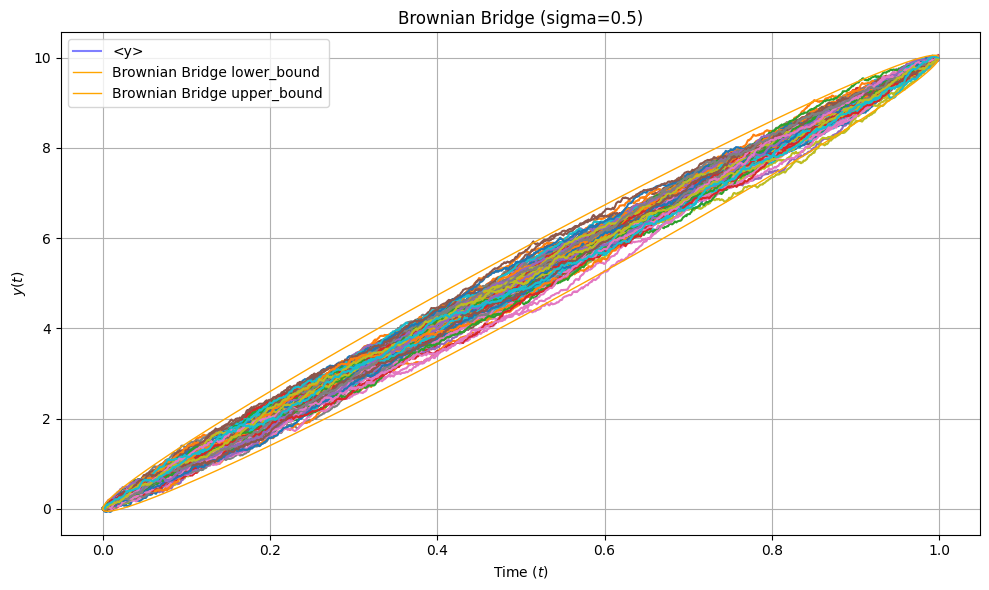

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

np.random.seed(233)
experiment_name = "bd"  # 你可以根据需要动态设置这个变量
log_dir = Path('experiments') / experiment_name
log_dir.mkdir(parents=True, exist_ok=True)
mu = 0
sigma = 0.5
a = 10
T = 1
epsilon = 0.001
num_samples = 100

t = np.arange(0, T, epsilon)

y_mean = a * t
variance = sigma**2 * t * (1 - t/T)
std_dev = np.sqrt(variance)

upper_bound = y_mean + 3 * std_dev
lower_bound = y_mean - 3 * std_dev
y_bridge = np.zeros((t.shape[0], num_samples))

for i in range(len(t) - 1):
    dt = t[i+1] - t[i]      # dt = epsilon
    dydt = (a * T - y_bridge[i]) / (T - t[i])
    diffusion = sigma * np.sqrt(dt) * np.random.randn(num_samples,)
    y_bridge[i+1] = y_bridge[i] + dydt * dt
    y_bridge[i+1, :] += diffusion
    
plt.figure(figsize=(10, 6))
plt.plot(t, y_mean, label=r'<y>', color='blue', alpha=0.5)
plt.plot(t, y_bridge)
plt.plot(t, lower_bound, color='orange', linewidth=1, label='Brownian Bridge lower_bound')
plt.plot(t, upper_bound, color='orange', linewidth=1, label='Brownian Bridge upper_bound')


plt.title('Brownian Bridge (sigma=0.5)')
plt.xlabel('Time ($t$)')
plt.ylabel('$y(t)$')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.savefig(log_dir / 'brownian_bridge_0.5sigma.jpg', dpi=300)
# plt.show()

ax.grid(alpha=0.2)
ax.plot(np.sort(y_bridge[-1, :])-10, label='sgima=0.5')
ax.legend()
fig.show()

fig.savefig(log_dir / 'brownian_bridge_error.jpg', dpi=300)

# Ornstein-Uhlenbeck bridge
---
$$
b(x, t)=\theta(\mu-x), \quad \sigma(x, t)=\text { const. } \equiv \sigma,
$$

迭代公式：

$$
X_t=X_{t-1}+\theta\left(\mu-X_{t-1}\right)+\sigma \eta_t, \quad X_0=0
$$

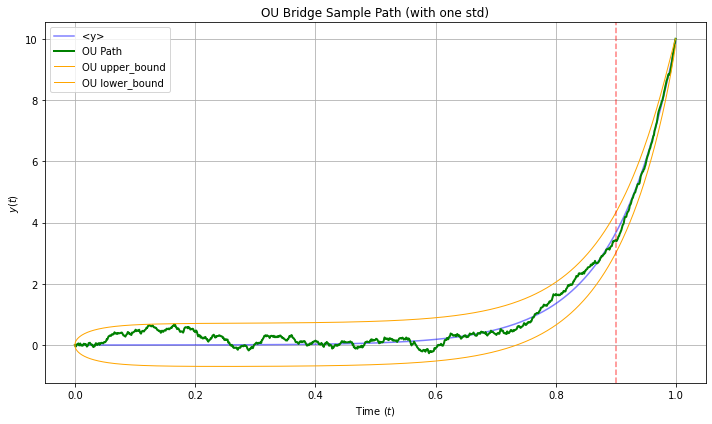

In [22]:
import numpy as np
import matplotlib.pyplot as plt

theta = 10 
mu = 0
sigma = 1
a = 10
T = 1  
dt = 0.001 

t = np.arange(0, T, dt)  
y = np.zeros(len(t))
y[0] = 0 

mean = (a*T-mu)*np.sinh(theta*t)/np.sinh(theta*T) + mu*(1 - np.sinh(theta*(T-t))/np.sinh(theta*T))
std = np.sqrt(sigma**2 * np.sinh(theta*(T-t)) * np.sinh(theta*t)/np.sinh(theta*T))
upper_bound = mean + std
lower_bound = mean - std

for i in range(len(t)-1):
  dydt = theta*(mu - y[i])*np.cosh(theta*(T-t[i+1]))/np.sinh(theta*(T-t[i+1])) + theta*(a*T-mu)/np.sinh(theta*(T-t[i+1]))
  diffusion = sigma * np.sqrt(dt) * np.random.randn()
  y[i+1] = y[i] + dydt*dt + diffusion

plt.figure(figsize=(10, 6))
plt.plot(t, mean, label=r'<y>', color='blue', alpha=0.5)
plt.plot(t, y, color='green', linewidth=2, label='OU Path')
plt.plot(t, upper_bound, color='orange', linewidth=1, label='OU upper_bound')
plt.plot(t, lower_bound, color='orange', linewidth=1, label='OU lower_bound')

plt.axvline(x=T-1/theta, color='red', linestyle='--', alpha=0.5) 
plt.title('OU Bridge Sample Path (with one std)')
plt.xlabel('Time ($t$)')
plt.ylabel('$y(t)$')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.savefig('outs/OU_bridge1.jpg', dpi=300)
plt.show()